In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#helping functions

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

In [29]:
#path_file = "./output/mnist/z_ass/"
path_file = "./output/cifar10/z_ass/"
point_files = [
    #cifar10
    #"wPCA_CNN2_G10_partition_iid_nclient300.npy",
    #"wPCA_CNN2_G100_partition_iid_nclient300.npy",
    "wPCA_CNN2_G10_partition_noniid90_nclient300.npy"
    #mnist
    #"wPCA_MLP2_G10_partition_noniid82_nclient100.npy",
    #"wPCA_MLP2_G10_partition_noniid90_nclient300.npy"
    
]

"""
zfiles = [["g_qw_d_euclidean_MLP2_G10_partition_noniid82_nclient100.npy.part.10",
          "1z_rnd_num_client100.part10"],
          ["g_nw_d_euclidean_MLP2_G10_partition_noniid82_nclient100.npy.part.10",
          "1z_rnd_num_client100.part10"]
         ]
         
zfiles = [["g_qw_d_euclidean_MLP2_G10_partition_noniid82_nclient100.npy.part.10",
          "1z_rnd_num_client100.part10"],
          ["g_nw_d_euclidean_MLP2_G10_partition_noniid82_nclient100.npy.part.10",
          "1z_rnd_num_client100.part10"]
         ]
"""
#cifar-10

zfiles = [["1z_rnd_num_client300.part20",
           "g_nw_d_minkowski_p1.0_CNN2_G10_partition_noniid90_nclient300.npy.part.20"
          ]
          #["g_nw_d_euclidean_MLP2_G10_partition_noniid82_nclient100.npy.part.10",
          #"1z_rnd_num_client100.part10"]
         ]


#label_file = "label_partition_noniid82_#label2_nclient100.npy"

#noniid82_label2 = np.load(path_file + label_file)
#noniid82_label2 = noniid82_label2.astype(int)
color = [] #for noniid82

for i in range(1, 11):
    for j in range(10):
        color.append(i)
num_clients_per_color = 30
color2 = []
for i in range(1, 11):
    for j in range(num_clients_per_color):
        color2.append(i)

#print(noniid82_label2)

In [30]:
n_pfiles = len(point_files)
n_zfiles = len(zfiles)

dfp = []
dfz = [[],[]]

for i in range(n_pfiles):
    dfp.append(pd.read_csv(path_file + point_files[i]))

for i in range(n_zfiles):
    z0 = pd.read_csv(path_file + zfiles[i][0], header = None, index_col = None)
    z0 = z0.values.squeeze()
    dfz[0].append(z0)
    
    z1 = pd.read_csv(path_file + zfiles[i][1], header = None, index_col = None)
    z1 = z1.values.squeeze()
    dfz[0].append(z1)
    
    

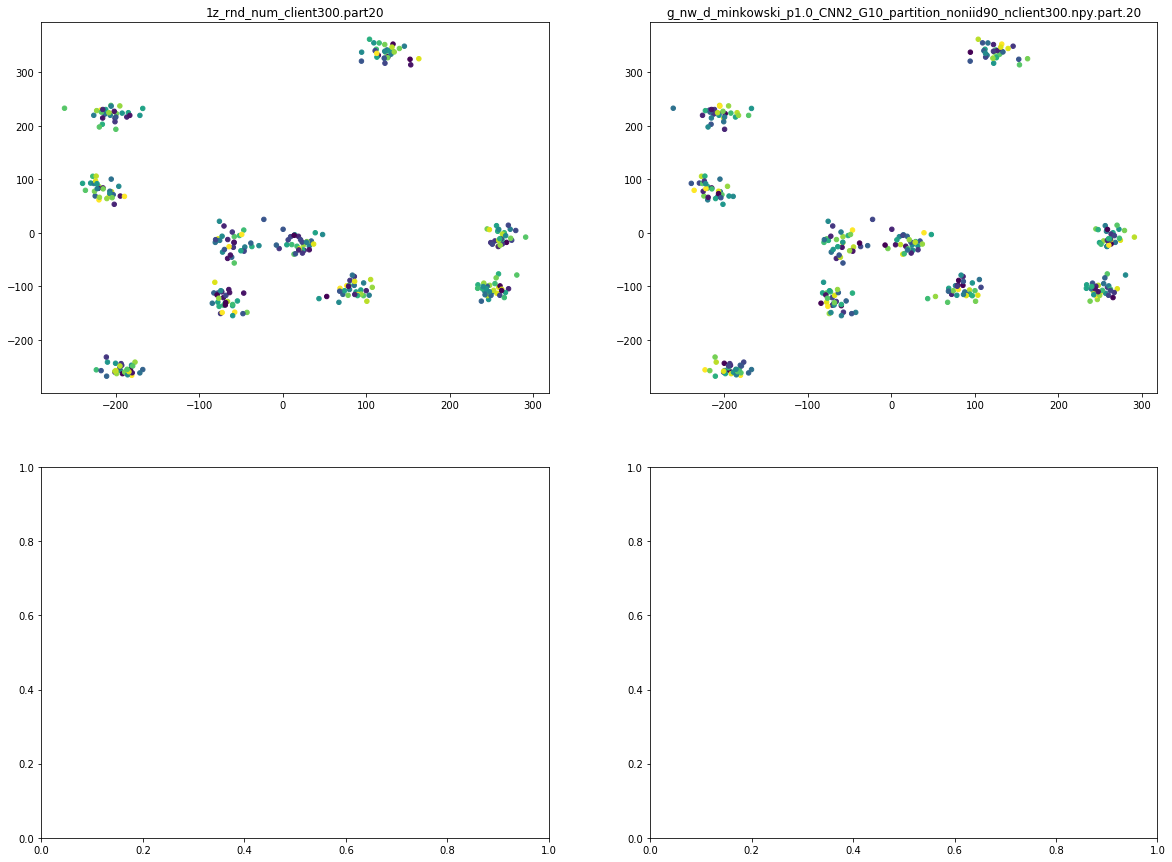

In [31]:
#fig, axs = plt.subplots(n_zfiles+1, n_pfiles, figsize=(20,15))
fig, axs = plt.subplots(2,2, figsize=(20,15))

axs[0,0].set_title(zfiles[0][0]) #random assignment
axs[0,0].scatter(dfp[0]['pc1'], dfp[0]['pc2'], s= 20, c = dfz[0][0])
axs[0,1].set_title(zfiles[0][1]) #metis assignment
axs[0,1].scatter(dfp[0]['pc1'], dfp[0]['pc2'], s= 20, c = dfz[0][1])# c=noniid82_label2[:,0]) , c = dfz[1]

#for p in range(n_pfiles):
#    for z in range(n_zfiles):
#        axs[z+1,p].set_title(zfiles[z][p])
#        axs[z+1,p].scatter(dfp[p]['pc1'], dfp[p]['pc2'], s= 20, c=dfz[p][z])
        
plt.show()

In [34]:
print(dfp)

[     Unnamed: 0         pc1         pc2
0             0  -22.562538   25.158615
1             1   47.835290   -3.090491
2             2   10.886092  -21.892223
3             3   17.176880  -24.937235
4             4   24.946856  -22.497892
..          ...         ...         ...
295         295 -199.869920  193.336260
296         296 -215.688660  214.398590
297         297 -171.063660  219.260420
298         298 -206.589420  219.488890
299         299 -208.291800  224.271270

[300 rows x 3 columns]]


NameError: name 'pfiles' is not defined

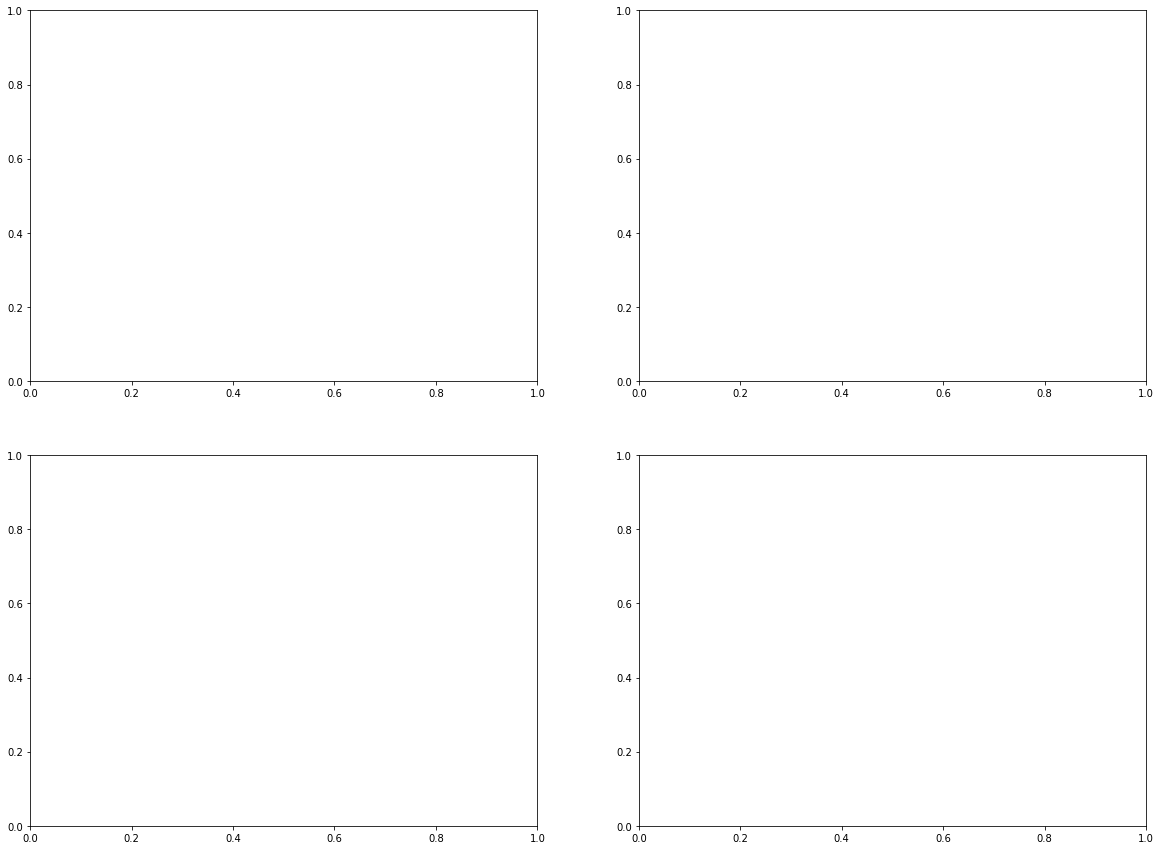

In [33]:
    
#fig, axs = plt.subplots(n_zfiles+1, n_pfiles, figsize=(20,15))
fig, axs = plt.subplots(2,2, figsize=(20,15))

axs[0,0].set_title(pfiles[0])
axs[0,0].scatter(dfp[0]['pc1'], dfp[0]['pc2'], s= 20, c=color2)
axs[0,1].set_title(pfiles[1])
axs[0,1].scatter(dfp[1]['pc1'], dfp[1]['pc2'], s= 20, c = color2)# c=noniid82_label2[:,0])

#for p in range(n_pfiles):
#    for z in range(n_zfiles):
#        axs[z+1,p].set_title(zfiles[z][p])
#        axs[z+1,p].scatter(dfp[p]['pc1'], dfp[p]['pc2'], s= 20, c=dfz[p][z])
        
plt.show()

In [ ]:
zfiles[0][1]

In [ ]:
n_pfiles

In [ ]:
n_zfiles